### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [275]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [283]:
data = pd.read_csv('Data.csv')
item = pd.read_csv('item.csv')
user = pd.read_csv('user.csv')


#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [23]:
data.shape
item.shape
user.shape
data.info()
item.info()
user.info()
data.describe
item.describe
user.describe
data.isnull().sum().sum()
item.isnull().sum().sum()
user.isnull().sum().sum()

0

#### 4. Find the number of movies per genre using the item data - 5 marks

In [134]:
# use sum on the default axis
item.iloc[:,3:22].sum()



unknown          1
Action         249
Adventure      133
Animation       42
Childrens      119
Comedy         499
Crime          107
Documentary     50
Drama          715
Fantasy         22
Film-Noir       23
Horror          90
Musical         55
Mystery         59
Romance        242
Sci-Fi         100
Thriller       247
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [143]:
#hint: use sum on the axis = 1
col1 = item.iloc[:,3:22].sum(axis = 1)
item.loc[col1 > 1]

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1661,1663,Nothing Personal,30-Apr-1997,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1667,1669,MURDER and murder,20-Jun-1997,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1668,1670,Tainted,01-Feb-1998,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1671,1673,Mirage,01-Jan-1995,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [93]:
item.loc[item['unknown']== 1].drop

<bound method DataFrame.drop of       movie id    movie title release date  unknown  Action  Adventure  \
1371      1373  Good Morning    4-Feb-1971        1       0          0   

      Animation  Childrens  Comedy  Crime  ...  Fantasy  Film-Noir  Horror  \
1371          0          0       0      0  ...        0          0       0   

      Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
1371        0        0        0       0         0    0        0  

[1 rows x 22 columns]>

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [ ]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [40]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


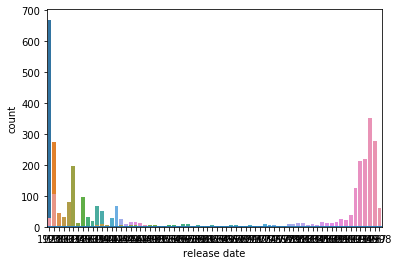

In [187]:
sns.distplot(user.age)
sns.countplot(user.gender)
sns.countplot(user.occupation)
a = pd.DatetimeIndex(item["release date"]).year
sns.countplot(a)


### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

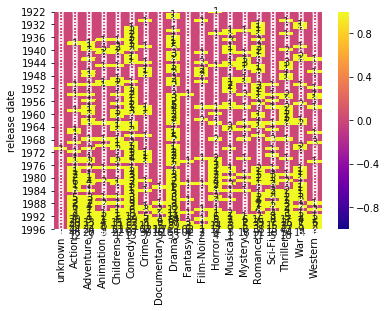

In [361]:
#item2 = item[item['release date']]
#item2 = item[item.iloc[:,3:22]]

#item = item.apply(lambda col:pd.to_numeric(col, errors='coerce')) 
item0 = item.drop(columns='movie id')
item2 = item0.iloc[:,3:]
item3 = pd.DatetimeIndex(item0["release date"]).year

item4 = item0.groupby(item3).sum()

sns.heatmap(item4,annot=True,cmap='plasma',vmin=-1,vmax=1)
#item2 = item.set_index('release date')
#item2.groupby(['START',item.iloc[:,3:22]]).sum().sort_values(ascending=False).head(10)



### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [467]:
movie_ratings = pd.merge(item,data)

#1
Count_rating = pd.DataFrame(movie_ratings.groupby('movie title')['rating'].count())
rank_count = Count_rating.sort_values(('rating'),ascending=False)
col = rank_count['rating']
best_rates = rank_count.loc[col > 100]
Average_ratings['mean'] = pd.DataFrame(movie_ratings.groupby('movie title')['rating'].mean())
rank_mean = Average_ratings.sort_values(('mean'),ascending=False)

rank_mean








,rating,mean
movie title,,
"Close Shave, A",112,4.491071
Schindler's List,298,4.466443
"Wrong Trousers, The",118,4.466102
Casablanca,243,4.456790
"Shawshank Redemption, The",283,4.445230
...,...,...
Spawn,143,2.615385
Event Horizon,127,2.574803
Crash,128,2.546875


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



In [466]:
d1 = pd.merge(item,data)
d2 = pd.merge(user,data)
final = pd.merge(d1,d2)

table = pd.DataFrame(final.groupby('gender')['rating','Drama','Sci-Fi','Romance'].sum())

table['Drama%']= (table['Drama']/table['rating'])*100
table['Sci-Fi%']= (table['Sci-Fi']/table['rating'])*100
table['Romance%']= (table['Romance']/table['rating'])*100
table

#Conclusion : more women watch drama than men
#             more men watch Sci-fi than women
#             more women watch Romance than men

,rating,Drama,Sci-Fi,Romance,Drama%,Sci-Fi%,Romance%
gender,,,,,,,
F,90894,11008,2629,5858,12.110810,2.892380,6.444870
M,262061,28887,10101,13603,11.023006,3.854446,5.190776
